Datasets can be downloaded [here](https://www.dropbox.com/sh/e3z9hzgoefpntjm/AADYmowe_-aF-C2dWJxp9q-xa?dl=0)

Ref: Paul, F. et al. Transcriptional Heterogeneity and Lineage Commitment in Myeloid Progenitors. Cell 163, 1663-1677 (2015).

In [2]:
import stream as st
st.__version__

'1.0'

In [3]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

In [4]:
adata=st.read(file_name='data_paul.tsv.gz',file_path='./',workdir='./stream_result_high_dim/')

Saving results in: ./stream_result_high_dim/


In [5]:
st.add_cell_labels(adata,file_name='cell_label2.tsv.gz',file_path='./')
st.add_cell_colors(adata,file_name='cell_label2_color.tsv.gz',file_path='./')

In [6]:
adata

AnnData object with n_obs × n_vars = 2699 × 3004
    obs: 'label'
    uns: 'workdir', 'label_color'

In [7]:
st.cal_qc(adata,assay='rna')

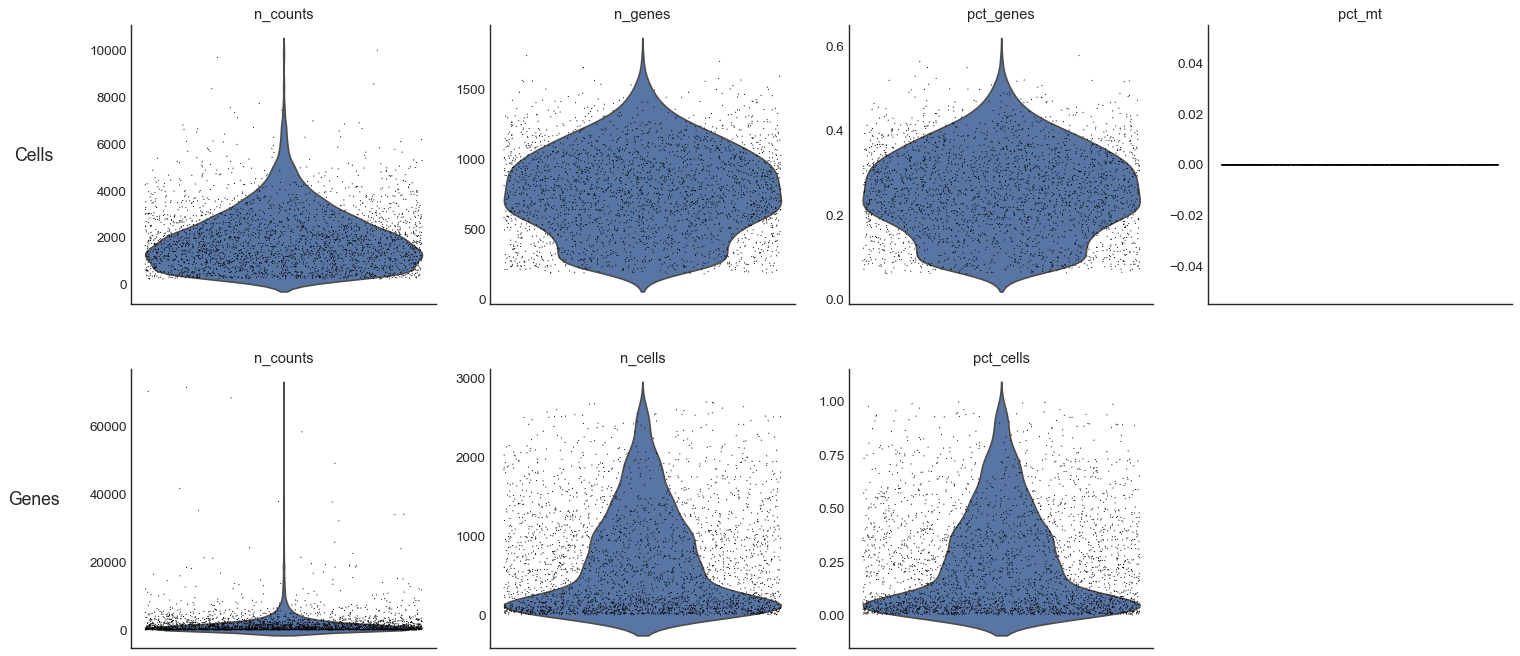

In [8]:
st.plot_qc(adata)

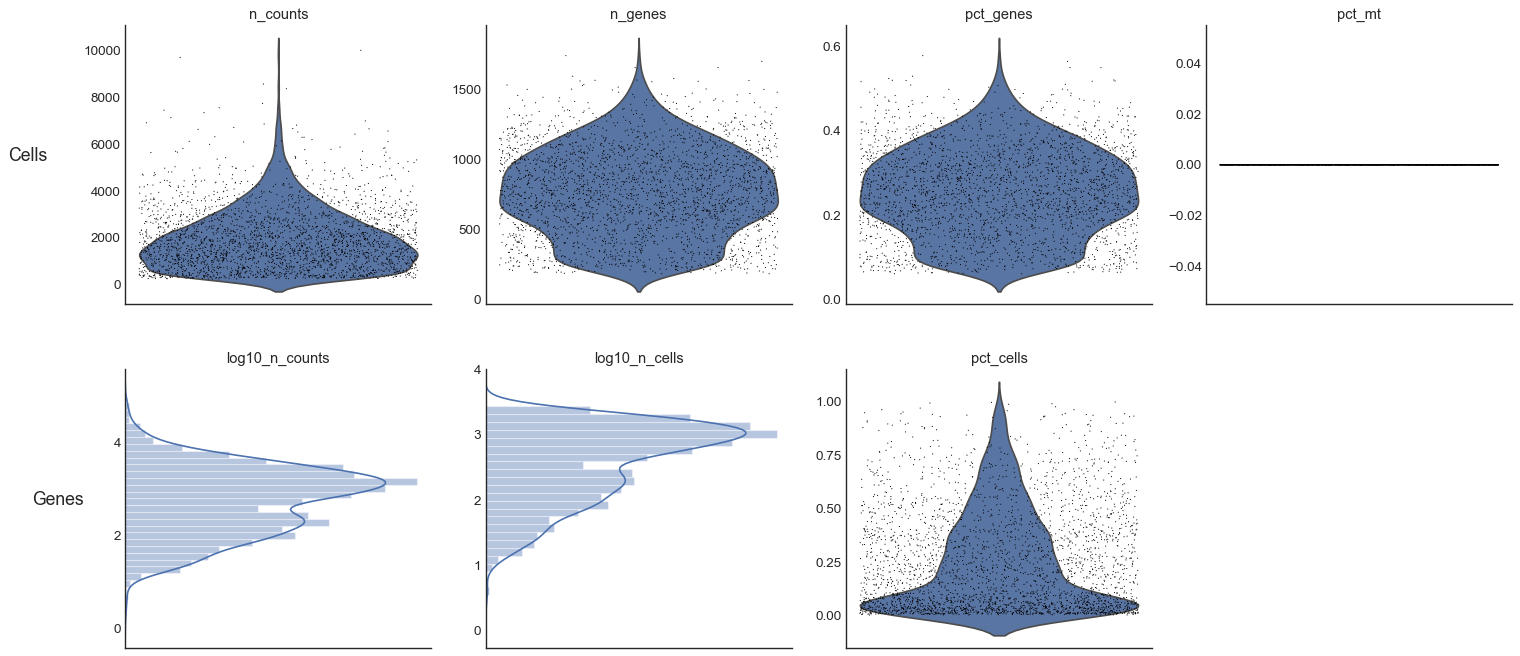

In [9]:
st.plot_qc(adata,log_scale=[4,5],hist_plot=[4,5])

In [10]:
st.normalize(adata,method='lib_size')
st.log_transform(adata)
st.remove_mt_genes(adata)

500 variable genes are selected


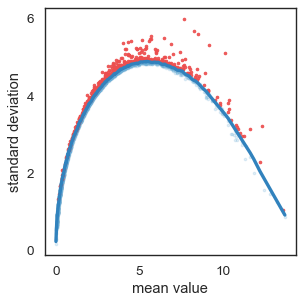

In [11]:
st.select_variable_genes(adata,loess_frac=0.01,n_genes=500)

In [12]:
adata

AnnData object with n_obs × n_vars = 2699 × 3004
    obs: 'label', 'n_counts', 'n_genes', 'pct_genes', 'pct_mt'
    var: 'n_counts', 'n_cells', 'pct_cells'
    uns: 'workdir', 'label_color', 'assay', 'var_genes'
    obsm: 'var_genes'

In [13]:
st.dimension_reduction(adata,method='mlle',feature='var_genes',n_components=10,nb_pct=0.025)

feature var_genes is being used ...
1 cpus are being used ...


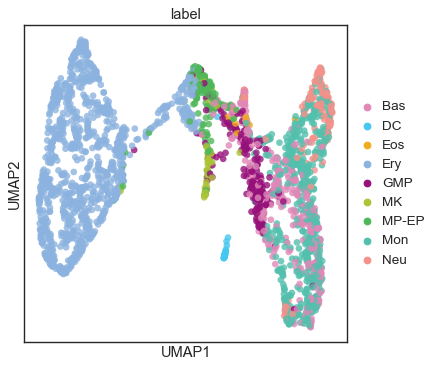

In [14]:
st.plot_visualization_2D(adata,nb_pct=0.1,color=['label'],use_precomputed=False)

#### switch to low dimensional space

In [15]:
adata_low = st.switch_to_low_dimension(adata,n_components=2)

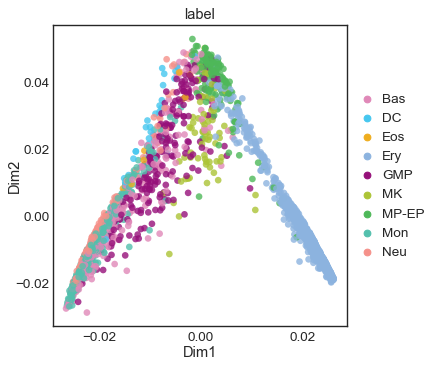

In [16]:
st.plot_dimension_reduction(adata_low,n_components=2)

In [17]:
st.seed_elastic_principal_graph(adata_low)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 3


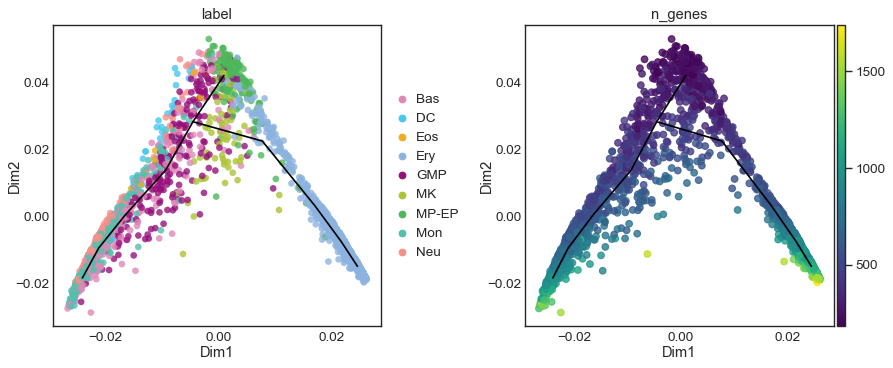

In [18]:
st.plot_dimension_reduction(adata_low,color=['label','n_genes'],n_components=2,show_graph=True,show_text=False)

In [19]:
st.elastic_principal_graph(adata_low)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 2699 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||50
	
1.227e-05
	
50
	
49
	
46
	
1
	
0
	
0
	
5.019e-06
	
4.527e-06
	
0.9932
	
0.9939
	
6.847e-06
	
4.07e-07
	
2.035e-05
	
0.001018
	
0


11.427 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 3


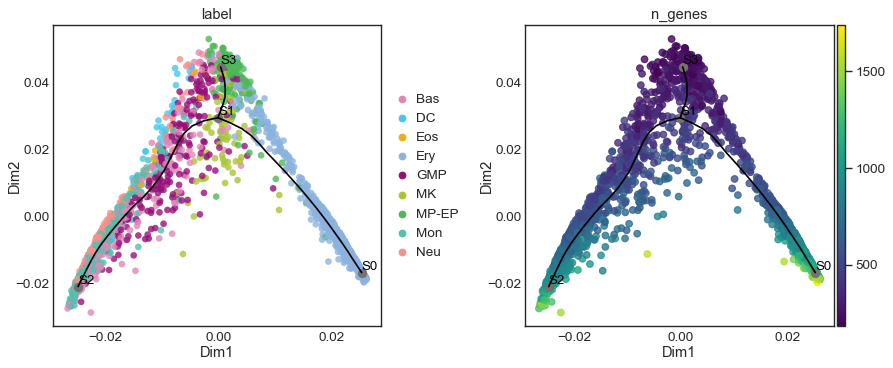

In [20]:
st.plot_dimension_reduction(adata_low,color=['label','n_genes'],n_components=2,show_graph=True,show_text=True)

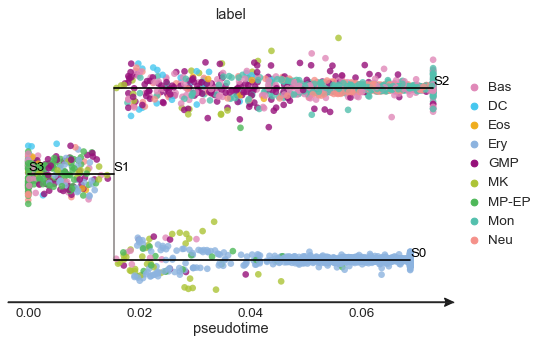

In [21]:
st.plot_stream_sc(adata_low,root='S3',color=['label'],
                  dist_scale=0.2,show_graph=True,show_text=True)

#### switch back to high dimensional space


In [22]:
init_nodes_pos,init_edges = st.infer_initial_structure(adata_low)

Node 6 is calculated using 5nearest neighbor cells


In [23]:
st.seed_elastic_principal_graph(adata,init_nodes_pos=init_nodes_pos,init_edges=init_edges)

Seeding initial elastic principal graph...
Setting initial nodes...
The number of initial nodes is 50
Setting initial edges...
Number of initial branches: 3


Importing precomputed umap visualization ...


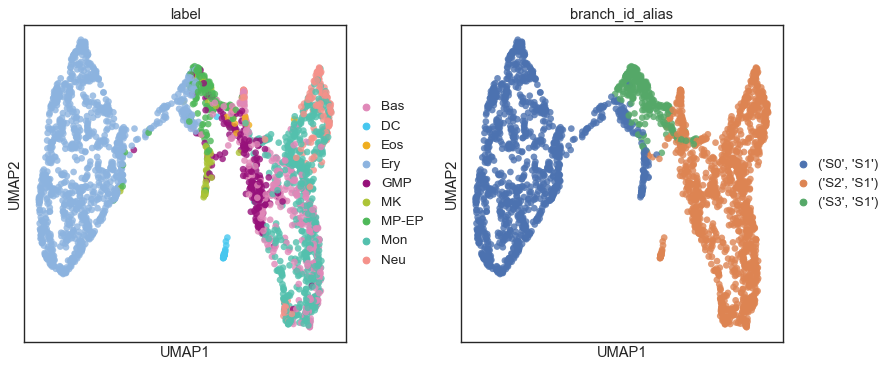

In [24]:
st.plot_visualization_2D(adata,color=['label','branch_id_alias'],fig_ncol=4)

In [25]:
st.elastic_principal_graph(adata,incr_n_nodes=10)

epg_n_nodes is too small. It is corrected to the initial number of nodes plus incr_n_nodes
Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 60 nodes on 2699 points and 10 dimensions"


[1]
 "Using a single core"


Nodes = 
50
 
51
 
52
 
53
 
54
 
55
 
56
 
57
 
58
 
59
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

5||60
	
0.0009788
	
60
	
59
	
48
	
5
	
0
	
0
	
0.0006464
	
0.000633
	
0.8256
	
0.8292
	
0.0002843
	
4.808e-05
	
0.002885
	
0.1731
	
0


11.377 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 11


Importing precomputed umap visualization ...


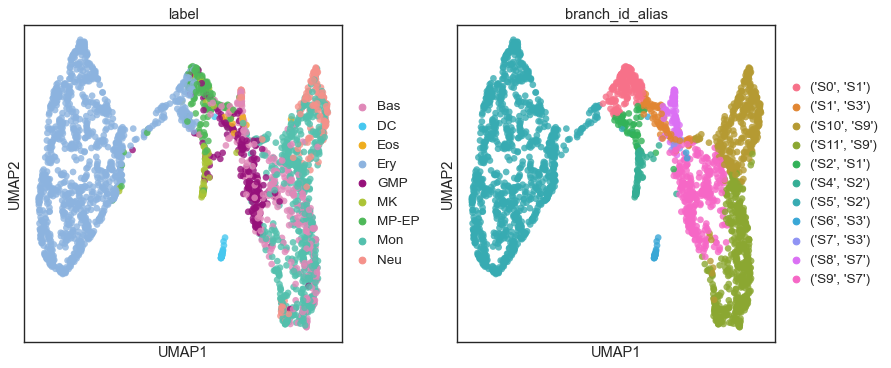

In [26]:
st.plot_visualization_2D(adata,color=['label','branch_id_alias'])

In [27]:
st.extend_elastic_principal_graph(adata)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 11


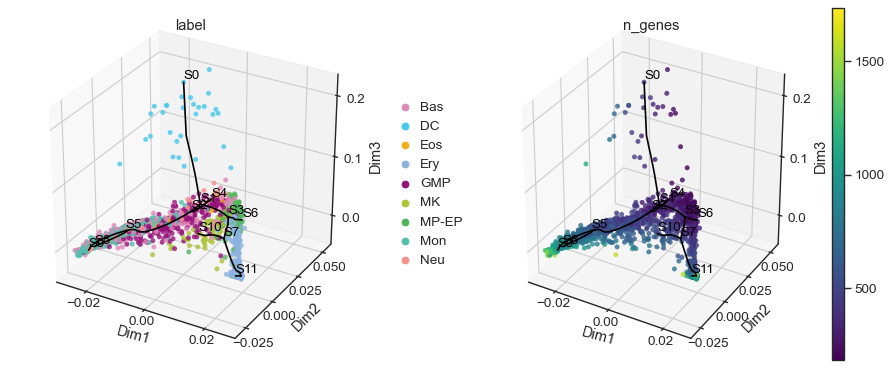

In [29]:
st.plot_dimension_reduction(adata,color=['label','n_genes'],n_components=3,show_graph=True,show_text=True)

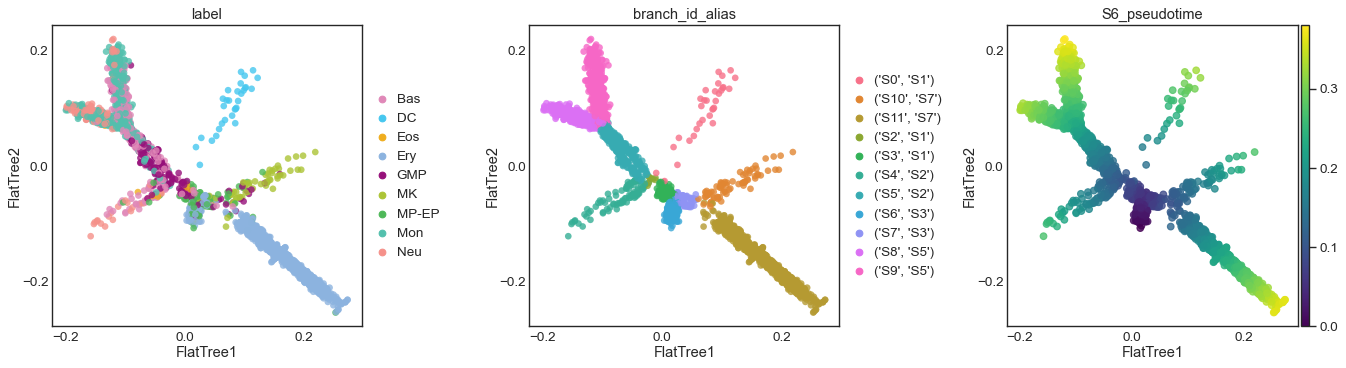

In [30]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S6_pseudotime'],
                  dist_scale=0.3,show_graph=False,show_text=False)

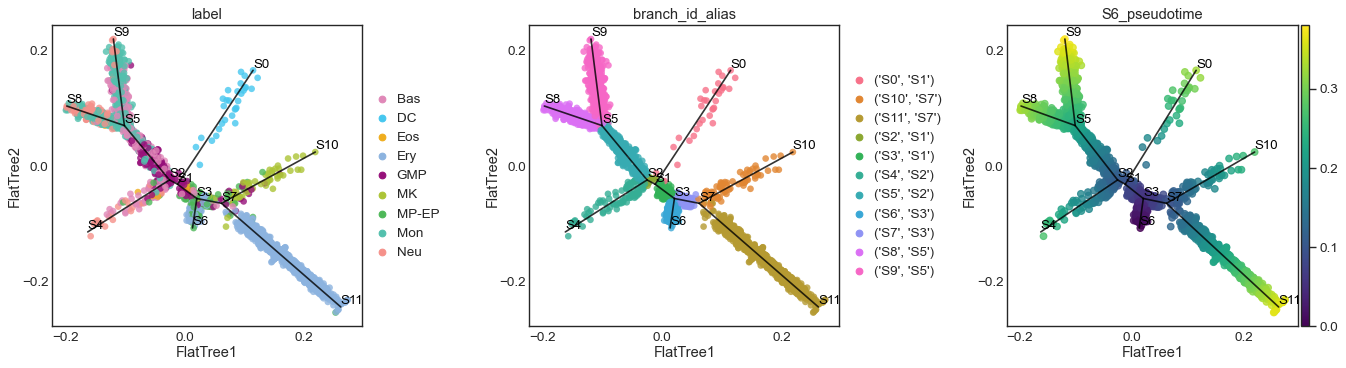

In [31]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S6_pseudotime'],
                  dist_scale=0.3,show_graph=True,show_text=True)

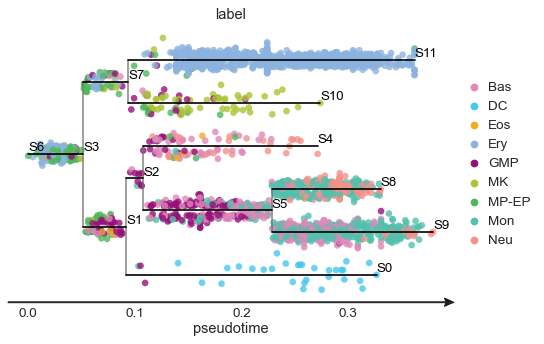

In [33]:
st.plot_stream_sc(adata,root='S6',dist_scale=0.5)

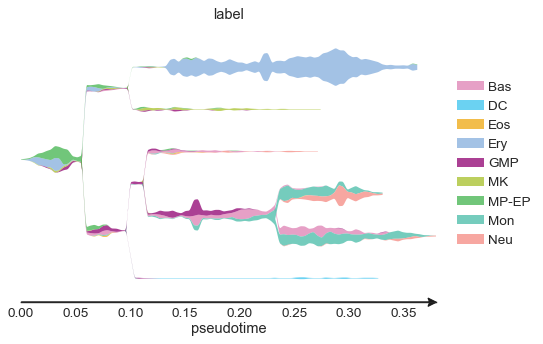

In [34]:
st.plot_stream(adata,root='S6')

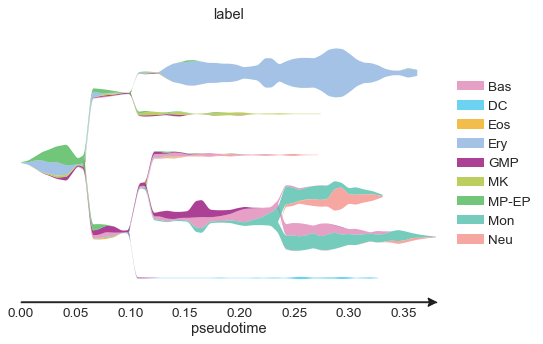

In [35]:
st.plot_stream(adata,root='S6',dist_scale=1.2,factor_min_win=1.2)

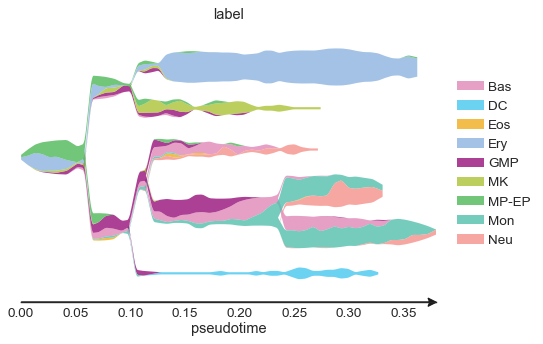

In [36]:
st.plot_stream(adata,root='S6',log_scale=True,factor_min_win=1.2)

In [37]:
st.write(adata,file_name='adata.pkl')
st.write(adata_low,file_name='adata_low.pkl')